<a href="https://colab.research.google.com/github/ptrzky/Machine-Learning/blob/main/MID_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
# <center> *LAPORAN TUGAS MACHINE LEARNING*

  <center> ALGORITMA SUPERVISED LEARNING 

<center><img src="https://www.unhas.ac.id/wp-content/uploads/2022/09/Logo-Resmi-Unhas-1.png" width=40%> </center>

## <center> *DISUSUN OLEH*
<center> AHMAD JALU FAHREZA NURHAKIM | H071201057

<center> JUMADIL | H071201061 

<center> SISKANTI | H071201064

<center> PUTRI REZKY AMEILYA B. | H071201078

<br><br><br><br><br>
<center> PRODI SISTEM INFORMASI

<center> DEPARTEMEN MATEMATIKA

<center> FAKULTAS MATEMATIKA DAN ILMU PENGETAHUAN ALAM

<center> 2022




<br><br><br><br><br>
# Stroke Prediction Dataset

Dataset yang digunakan yaitu dataset yang memprediksi terjadinya stroke. Untuk memprediksi kemungkinan seorang pasien terkena stroke dapat dilihat berdasarkat parameter input seperti jenis kelamin, usia, berbagai penyakit,
 dan status merokok. Setiap baris pada data akan memberikan informasi tentang pasien yang dapat terkena stroke dan tidak. 


Berikut informasi dari atribut pada data stroke :

1.   id : atribut unik
2.   gender (jenis kelamin) : Pria, Wanita, dan Lainnya
3.   age (usia) : usia pasien
4.   hypertension (hipertensi) : 0 jika pasien tidak memiliki hipertensi dan 1 jika pasien memiliki hipertensi
5.   heart_disease (penyakit_jantung) : 0 jika pasien tidak memiliki penyakit jantung dan 1 jika pasien memiliki penyakit jantung
6.   ever_married (pernah menikah) : Tidan atau Ya
7.   work_type (tipe_pekerja) : anak-anak, pemerintah, tidak pernah bekerja, swasta, dan wiraswasta
8.   Residence_type (tipe tempat tinggal) : Pedesaan atau perkotaan
9.   avg_glucose_level (rata-rata kadar glukosa) : kadar glukosa rata-rata dalam darah
10.   bmi : indeks massa tubuh
11.   smoking_status (status merokok) : sebelumnya merokok, tidak pernah merokok, merokok, dan tidak diketahui
12.   stroke : 0 jika pasien tidak mengalami stroke dan 1 jika pasien mengalami stroke

Untuk kolom smoking_status pada bagian "tidak diketahui" menginformasikan bahwa informasi tidak tersedia untuk pasien






# Library Python 

**Berikut beberapa library yang akan digunakan :**



1.   Pandas
      Pandas digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data yang cepat, fleksibel dan ekspresif serta menyediakan fitur penanganan data yang hilang, pengindeksan yang rumit dan penyelarasan data.

2.   Numpy
      Numpy atau Numerical adalah library python untuk perhitungan matematis dan ilmiah. Numpy memiliki fungsi aljabar linear, Fourier transform, dan komputasi matriks yang digunakan untuk mengembangkan aplikasi dimana kecepatan dan sumber daya menjadi prioritas utama. 

3.   Matplotlib
      Matplotlib digunakan untuk membuat visualisasi data yang statis, animasi, dan interaktif. Menyediakan pilihan kustomisasi dan grafik yang sangat beragam.

4.   Seaborn
      Seaborn digunakan untuk visualisasi data statistik, pembuatan hotmap dan visualisasi yang merangkum data dan menggambarkan distribusi. Digunakan juga pada frame dan array. Sekain itu juga berfungsi untuk plot dasar grafik batang, grafik garis, dan diagram lingkaran

5.   Sklearn
      Sklearn atau biasa dikenal dengan SciKit-Leasrn dapat menampilkan algoritma klasifikasi, regresi, dan pengelompokkan, termasuk DBSCAN, peningkatan gradien, mesin vektor, dan random forsts. Berfungsi untuk menangani standard machine learning dan aplikasi penambangan data. 







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

Membuat sebuah variabel untuk membaca sebuah data stroke yang akan digunakan menggunakan library pandas

In [ ]:
data_stroke = pd.read_csv("drive/MyDrive/Machine Learning/healthcare-dataset-stroke-data.csv")

Menampilkan isi dari data stroke

In [ ]:
data_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Menampilkan daftar nama kolom yang ada pada data stroke menggunakan perintah dibawah ini.

In [ ]:
column_names = data_stroke.columns
column_names

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Menampilkan data stroke 10 baris pertama menggunakan perintah .head()

In [ ]:
data_stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Menampilkan statistik deskriptif dari data stroke dengan menggunakan perintah .describe()

In [ ]:
data_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Untuk mengetahui kolerasi data yang bersifat numerik menggunakan perintah .corr()

In [ ]:
data_stroke.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Menghitung jumlah sebuah value yang terdapat pada data stroke untuk setiap kolomnya menggunakan perintah dibawah ini.

In [ ]:
for i in data_stroke:
  print("Attribute :",i)
  print(data_stroke[i].value_counts())
  print()

Attribute : id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64

Attribute : gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Attribute : age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

Attribute : hypertension
0    4612
1     498
Name: hypertension, dtype: int64

Attribute : heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64

Attribute : ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64

Attribute : work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Attribute : Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Attribute : avg_glucose_level
93.88     

Memuculkan jumlah baris dan kolom pada data stroke dengan perintah .shape

In [ ]:
data_stroke.shape

(5110, 12)

Mengetahui tipe data yang ada pada data stroke menggunakan perintah dibawah ini.

In [ ]:
for i in data_stroke:
  print(f"{i} bertipe data {data_stroke[i].dtypes}")

id bertipe data int64
gender bertipe data object
age bertipe data float64
hypertension bertipe data int64
heart_disease bertipe data int64
ever_married bertipe data object
work_type bertipe data object
Residence_type bertipe data object
avg_glucose_level bertipe data float64
bmi bertipe data float64
smoking_status bertipe data object
stroke bertipe data int64


Pada data stroke terdapat 12 kolom yang memiliki tipe data berbeda yaitu sebagai berikut : 

*   "id" memiliki tipe data integer (tipe data numerik untuk bilangan bulat)
*   "gender" memiliki tipe data object (object adalah tipe data yang tidak sekedar menyimpan data tetapi berisikan informasi lain)
*   "age" memiliki tipe data float (float adalah tipe data numerik untuk menyimpan angka yang memiliki komponen pecahan seperti 0.7, 0.23. 1.2)
*   "hypertension" memiliki tipe data integer
*   "heart_disease" memiliki tipe data integer
*   "ever_married" memiliki tipe data object
*   "work_type" memiliki tipe data object
*   "Residence_type" memiliki tipe data object
*   "avg_glucose_level" memiliki tipe data float
*   " bmi" memiliki tipe data float
*   "smoking_status" memiliki tipe data object
*   "stroke" memiliki tipe data integer



# MISSING VALUE

Missing value adalah hilangnya beberapa data yang telah diperoleh. Missing value erat kaitannya dalam proses perselisihan data (data wrangling) sebelum dilakukan analisis dan prediksi data. Salah satu terjadinya missing value adalah tidak terkumpunya beberapa informasi.

Missing value terbagi kedalam tiga tipe, yaitu : 

*   Missing at Random yaitu terjadinya missing data hanya berkaitan dengan variabel respon/pengamatan.
*   Missing completely at random yaitu terjadinya missing data tidak berkaitan dengan nilai semua variabel, apakah itu variabel dengan missing values atau dengan variabel pengamatan.  
*   Missing Not at random yaitu terjadinya missing pada suatu variabel berkaitan dengan variabel itu sendiri, sehingga ini tidak bisa diprediksi dari variabel lain pada suatu dataset



Untuk menemukan missing value, kita bisa menggunakan method isnull() . Method ini mengembalikan nilai berupa boolean,  yang mengembalikan nilai True jika sebuah record pada atribut tertentu tidak memiliki value apapun (null), dan mengembalikan False jika record tersebut memiliki value. Kita bisa memadukannya dengan method sum(). Hasilnya adalah atribut atau kolom-kolom yang terdapat pada dataframe tersebut beserta dengan jumlah value missing-nya.

In [ ]:
data_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dari pencarian missing value diatas, didapat missing value sebanyak 201 data pada kolom bmi

### Cara Penanganan Missing Value



1.   Menggunakan Metode Fill (Pengisian)

    Method yang dipakai dalam mengisi missing value yaitu fiilna(). Dengan parameternya adalah nilai tertentu. Ada berbagai nilai yang dapat dijadikan parameter mean, median, modus, atau random sample imputation untuk data numerik. Sedangkan untuk data categorical kita bisa mengisi missing valuenya berupa salah satu nilai yang terdapat pada fitur tersebut.




Mengisi missing value dengan mean ke dalam atribut yang ada pada kolom bmi

In [ ]:
df_fillna_mean = data_stroke.fillna(data_stroke.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Setelah dilakukan pengisian value dengan mean, maka akan ditampilkan pengecekan apakah masih ada missing value atau tidak.

In [ ]:
df_fillna_mean.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Karena missing value sudah tidak ada, maka akan ditampilkan dataset stroke yang bersih dari missing value

In [ ]:
df_fillna_mean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# CATEGORICAL ENCODING USING LABEL-ENCODING DAN ONE-HOT-ENCODER

Categorical encoding digunakan untuk mengubah data categorical menjadi data numerik. Tujuannya agar data tersebut dapat dipergunakan dalam Machine Learning. Karena machine learning umumnya hanya bisa memproses data-data numerik.
 
Terdapat dua cara dalam categorical encoding yaitu one-hot-encoder dan label-encoding.



1.   One-Hot-Encoder

    One-hot-encoder yaitu mengubah data categorical menjadi data numerik berupa angka biner 0 dan 1. Nantinya sebuah atribut yang memiliki n value yang berbeda akan dibagi menjadi n atribut. Setiap record akan memiliki value masing-masing dan atribut value_x akan bernilai 1 bila value record tersebut adalah x. Sebaliknya atribut_x akan bernilai 0 jika value record tersebut bukan x. Biasanya cara ini digunakan untuk mencegah pengurutan data setelah diubah menjadi data numerik.

    Atribut yang bertipe data categorical yang akan diubah menjadi data numerik yaitu **work_type**. Method yang digunakan yaitu  get_dummies() yang diambil dari library pandas. Parameternya adalah dataframe dan kolom yang bertipe data kategorik menjadi bertipe data numerik (angka biner). Untuk memanggilnya maka kita menyimpannya pada suatu variabel.



In [ ]:
df_one_hot_encoded_data = pd.get_dummies(df_fillna_mean, columns = ["work_type"])
print(df_one_hot_encoded_data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  \
0             Urban             228.69  36.600000  formerly smoked   

Setelah dilakukan one-hot-encoder pada atribut work_type, maka akan menghasilkan atribut baru yaitu : 

*   work_type_Govt_job
*   work_type_Never_worked
*   work_type_Private
*   work_type_Self-employed
*   work_type_children



In [ ]:
df_one_hot_encoded_data

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,28.893237,never smoked,0,0,0,1,0,0
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,never smoked,0,0,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,never smoked,0,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.600000,formerly smoked,0,0,0,1,0,0





2.   Label-Encoding (Manual)

    Label-encoding yaitu mengubah data categorical menjadi bilangan numerik. Bilangan numerik dapat berupa float yang akan mewakili data categorical. Tidak seperti one-hot-encoder, label-encoder lebih leluasa dalam memiliki angka-angka untuk mewakili data categorical, bukan hanya fokus pada bilangan biner seperti bilangan 1 dan 0. Label-encoding juga digunakan untuk memberi label pada atribut categorical yang memiliki derajat masing-masing. 
    
    Atribut yang bertipe data categorical yang akan diubah menjadi data numerik yaitu **Smoking Status**. Misalnya orang yang sedang merokok akan lebih berpotensi terkena stroke daripada orang yang sudah berhenti merokok. Orang yang sudah berhenti merokok akan lebih berpotensi terkena stroke daripada orang yang tidak pernah merokok. Sedangkan pasien yang tidak menyebutkan status merokoknya akan lebih berpotensi terkena stroke daripada orang yang tidak pernah merokok.



In [ ]:
df_label_encoding_manual = df_one_hot_encoded_data.copy()
cleanup_nums = {"smoking_status":     {"never smoked": 0, "Unknown": 1,
                                       "formerly smoked":2 ,"smokes":3 }}
df_label_encoding_manual.replace(cleanup_nums, inplace=True)
data_stroke.head()
data_stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Data categoric pada atribut smoking_status yang telah di ubah ke data numerik yang mana :

*   newer smoked : 0
*   Unknow : 1
*   Formely smoked : 2
*   Smoked : 3



In [ ]:
df_label_encoding_manual

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,2,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,28.893237,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,3,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,28.893237,0,0,0,0,1,0,0
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,0,0,0,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,0,0,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.600000,2,0,0,0,1,0,0


Setelah dilakukan label encoding maka dicek apakah ada missing value pada data stroke yang sekarang menggunakan perintah .isnull().sum()

In [ ]:
df_label_encoding_manual.isnull().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
stroke                     0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
dtype: int64



3.   Label-Encoding dengan Library menggunakan Modul Preprocessing pada Library Sklearn





In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_label_encoder = df_label_encoding_manual.copy()

Disini akan dipilih 3 atribut unik yang bertipe data categoric dan akan diubah ke tipe data numerik. Atribut yang dipilih adalah : 

*   Gender : Male, Female, Other
*   ever_married : Yes or No
*   Recidence_type : Urban dan Rural



In [ ]:
print(df_label_encoder['gender'].unique())
print(df_label_encoder['ever_married'].unique())
print(df_label_encoder['Residence_type'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Urban' 'Rural']


In [ ]:
df_label_encoder = df_label_encoder[~((df_label_encoder['gender'] != 'Male') &  (df_label_encoder['gender'] != 'Female'))]

In [ ]:
df_label_encoder

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,Yes,Urban,228.69,36.600000,2,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Rural,202.21,28.893237,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Rural,105.92,32.500000,0,1,0,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Urban,171.23,34.400000,3,1,0,0,1,0,0
4,1665,Female,79.0,1,0,Yes,Rural,174.12,24.000000,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Urban,83.75,28.893237,0,0,0,0,1,0,0
5106,44873,Female,81.0,0,0,Yes,Urban,125.20,40.000000,0,0,0,0,0,1,0
5107,19723,Female,35.0,0,0,Yes,Rural,82.99,30.600000,0,0,0,0,0,1,0
5108,37544,Male,51.0,0,0,Yes,Rural,166.29,25.600000,2,0,0,0,1,0,0


Mengecek missing value menggunakan perintah .isnull().sum()

In [ ]:
df_label_encoder.isnull().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
stroke                     0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
dtype: int64

In [ ]:
print(df_label_encoder['gender'].unique())

['Male' 'Female']


In [ ]:
enc = LabelEncoder()

In [ ]:
df_label_encoder["gender"] = enc.fit_transform(df_label_encoder["gender"].values)
df_label_encoder["ever_married"] = enc.fit_transform(df_label_encoder["ever_married"].values)
df_label_encoder["Residence_type"] = enc.fit_transform(df_label_encoder["Residence_type"].values)

Telah dilakukan label encoder pada 3 atribut yang telah dipilih yaitu sebagai berikut : 

*   gender (Male : 1, Female : 0)
*   ever_married (Yes : 1, No :0)
*   Recidence_type (Urban : 1, Rural : 0)




In [ ]:
df_label_encoder

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.600000,2,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,3,1,0,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,0,0,0,1,0,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,2,0,0,0,1,0,0


Menampilkan kolom yang ada pada data stroke yang sekarang menggunakan perintah .columns

In [ ]:
df_label_encoder.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
      dtype='object')

# NORMALISASI MENGGUNAKAN MIN MAX SCALLER

Normalisasi data adalah proses membuat beberapa variabel memiliki rentang nilai yang sama, tidak ada yang terlalu besar maupun kecil sehingga dapat membuat analisis statistik lebih mudah. 

Normalisasi data digunakan untuk menskalakan data suatu atribut sehingga berada dalam rentang yang lebih kecil, seperti -1 hingga 1 atau 0 hingga 1.

Metode Normalisasi Data :

*   Normisasi Z-score
*   Normalisasi Min-Max
*   Normalisasi Decilam Scaling

Pada data stroke ini metode normalisasi yang akan digunakan yaitu Normalisasi Min-Max.



In [ ]:
print('Min : ')
print(df_label_encoder.min(axis=0))
print()
print('Max : ')
print(df_label_encoder.max(axis=0))

Min : 
id                         67.00
gender                      0.00
age                         0.08
hypertension                0.00
heart_disease               0.00
ever_married                0.00
Residence_type              0.00
avg_glucose_level          55.12
bmi                        10.30
smoking_status              0.00
stroke                      0.00
work_type_Govt_job          0.00
work_type_Never_worked      0.00
work_type_Private           0.00
work_type_Self-employed     0.00
work_type_children          0.00
dtype: float64

Max : 
id                         72940.00
gender                         1.00
age                           82.00
hypertension                   1.00
heart_disease                  1.00
ever_married                   1.00
Residence_type                 1.00
avg_glucose_level            271.74
bmi                           97.60
smoking_status                 3.00
stroke                         1.00
work_type_Govt_job             1.00
work_type_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_label_encoder)

Akan mencari nilai terbesar dan nilai terkecil dengan menggunakan perintah .min() dan .max(). Dengan mengisi parameter axis=0 yang berarti satu dimensi

In [ ]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
column_name = df_label_encoder.columns

In [ ]:
df_normal = pd.DataFrame(data=data_scaled, columns= column_name)
df_normal.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.123214,1.0,0.816895,0.0,1.0,1.0,1.0,0.801265,0.301260,0.666667,1.0,0.0,0.0,1.0,0.0,0.0
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.0,0.679023,0.212981,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,0.426015,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,0.000000,1.0,0.0,0.0,1.0,0.0,0.0
3,0.824928,0.0,0.597168,0.0,0.0,1.0,1.0,0.536008,0.276060,1.000000,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.0,0.549349,0.156930,0.000000,1.0,0.0,0.0,0.0,1.0,0.0


Hasil Normalisasi min-max

In [ ]:
df_normal

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0.123214,1.0,0.816895,0.0,1.0,1.0,1.0,0.801265,0.301260,0.666667,1.0,0.0,0.0,1.0,0.0,0.0
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.0,0.679023,0.212981,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,0.426015,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,0.000000,1.0,0.0,0.0,1.0,0.0,0.0
3,0.824928,0.0,0.597168,0.0,0.0,1.0,1.0,0.536008,0.276060,1.000000,1.0,0.0,0.0,1.0,0.0,0.0
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.0,0.549349,0.156930,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.249297,0.0,0.975586,1.0,0.0,1.0,1.0,0.132167,0.212981,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
5105,0.614850,0.0,0.987793,0.0,0.0,1.0,1.0,0.323516,0.340206,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
5106,0.269730,0.0,0.426270,0.0,0.0,1.0,0.0,0.128658,0.232532,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
5107,0.514278,1.0,0.621582,0.0,0.0,1.0,0.0,0.513203,0.175258,0.666667,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_normal.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
      dtype='object')

In [ ]:
df_normal = df_normal[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'stroke']]

*  Atribut x disebut features yang berisi atribut 'gende', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking status', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'.

*  Atribut y disebut label / class yang berisi atribut 'stroke'

In [ ]:
x = df_normal.loc[: ,['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children']]
y = df_normal.loc[: ,['stroke']]

# VISUALIZE OUTLIERS

Outlier adalah titik data yang nilainya signifikan berbeda dengan populasi tertentu. Biasa juga disebut dengan pencilan. Pencilan adalah sebuah titik data yang terpaut jauh dari titik  data lainnya.

In [ ]:
y.isnull().sum()

stroke    0
dtype: int64

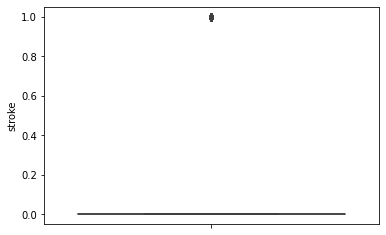

In [ ]:
import seaborn as sns
sns.boxplot(y=df_normal['stroke'])

In [ ]:
df_normal

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,1.0,0.816895,0.0,1.0,1.0,1.0,0.801265,0.301260,0.666667,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.743652,0.0,0.0,1.0,0.0,0.679023,0.212981,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.597168,0.0,0.0,1.0,1.0,0.536008,0.276060,1.000000,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.963379,1.0,0.0,1.0,0.0,0.549349,0.156930,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.975586,1.0,0.0,1.0,1.0,0.132167,0.212981,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
5105,0.0,0.987793,0.0,0.0,1.0,1.0,0.323516,0.340206,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
5106,0.0,0.426270,0.0,0.0,1.0,0.0,0.128658,0.232532,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
5107,1.0,0.621582,0.0,0.0,1.0,0.0,0.513203,0.175258,0.666667,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_normal.corr()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
gender,1.000000,-0.027752,0.021223,0.085685,-0.030171,-0.006105,0.054722,-0.025606,0.067496,-0.016598,0.011486,-0.032502,-0.026045,0.089226,0.009081
age,-0.027752,1.000000,0.276367,0.263777,0.679084,0.014031,0.238323,0.325858,0.079339,0.129965,-0.078667,0.116678,0.327949,-0.634320,0.245239
hypertension,0.021223,0.276367,1.000000,0.108292,0.164187,-0.007980,0.174540,0.160147,0.012585,0.017661,-0.021612,-0.005358,0.115417,-0.129535,0.127891
heart_disease,0.085685,0.263777,0.108292,1.000000,0.114601,0.003045,0.161907,0.038862,0.063182,0.001312,-0.015715,0.000068,0.086742,-0.091654,0.134905
ever_married,-0.030171,0.679084,0.164187,0.114601,1.000000,0.005988,0.155329,0.335563,0.085332,0.133964,-0.090873,0.154104,0.192637,-0.544658,0.108299
Residence_type,-0.006105,0.014031,-0.007980,0.003045,0.005988,1.000000,-0.004783,-0.000288,0.032282,0.013056,0.022848,-0.018005,0.010508,-0.002388,0.015415
avg_glucose_level,0.054722,0.238323,0.174540,0.161907,0.155329,-0.004783,1.000000,0.168910,0.025057,0.013908,-0.014665,0.016451,0.062770,-0.102195,0.131991
bmi,-0.025606,0.325858,0.160147,0.038862,0.335563,-0.000288,0.168910,1.000000,0.046804,0.077885,-0.028612,0.204055,0.070756,-0.442945,0.038912
smoking_status,0.067496,0.079339,0.012585,0.063182,0.085332,0.032282,0.025057,0.046804,1.000000,0.009656,-0.045893,0.029079,0.016738,-0.060838,0.030721
work_type_Govt_job,-0.016598,0.129965,0.017661,0.001312,0.133964,0.013056,0.013908,0.077885,0.009656,1.000000,-0.025263,-0.444394,-0.167849,-0.151417,0.002660


In [ ]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1.0,0.816895,0.0,1.0,1.0,1.0,0.801265,0.301260,0.666667,0.0,0.0,1.0,0.0,0.0
1,0.0,0.743652,0.0,0.0,1.0,0.0,0.679023,0.212981,0.000000,0.0,0.0,0.0,1.0,0.0
2,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,0.000000,0.0,0.0,1.0,0.0,0.0
3,0.0,0.597168,0.0,0.0,1.0,1.0,0.536008,0.276060,1.000000,0.0,0.0,1.0,0.0,0.0
4,0.0,0.963379,1.0,0.0,1.0,0.0,0.549349,0.156930,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.975586,1.0,0.0,1.0,1.0,0.132167,0.212981,0.000000,0.0,0.0,1.0,0.0,0.0
5105,0.0,0.987793,0.0,0.0,1.0,1.0,0.323516,0.340206,0.000000,0.0,0.0,0.0,1.0,0.0
5106,0.0,0.426270,0.0,0.0,1.0,0.0,0.128658,0.232532,0.000000,0.0,0.0,0.0,1.0,0.0
5107,1.0,0.621582,0.0,0.0,1.0,0.0,0.513203,0.175258,0.666667,0.0,0.0,1.0,0.0,0.0


Akan dilihat outlier yang terdapat pada atribut age, avg_glucose_level, dan bmi

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

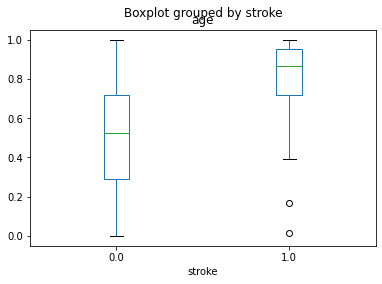

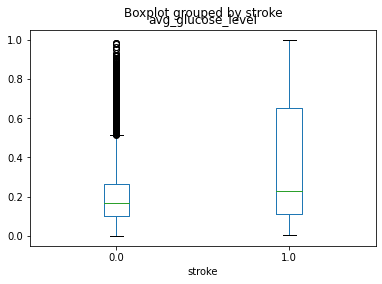

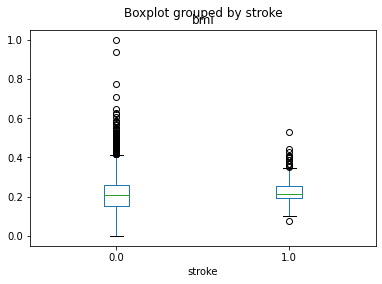

In [ ]:
import matplotlib.pyplot as plt 

column_outlier = ['age', 'avg_glucose_level', 'bmi' ]


for i in column_outlier:
  df_normal.boxplot(by ='stroke', column =[i], grid = False)

In [ ]:
Q1 = df_normal[column_outlier].quantile(0.25)
Q3 = df_normal[column_outlier].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print()
print('Max Value: ')
print(Q3 + 1.5*IQR)
print()
print('Min Value: ')
print(Q1 - 1.5*IQR)

age                  0.439453
avg_glucose_level    0.170114
bmi                  0.103093
dtype: float64

Max Value: 
age                  1.402832
avg_glucose_level    0.527398
bmi                  0.412371
dtype: float64

Min Value: 
age                 -3.549805e-01
avg_glucose_level   -1.530560e-01
bmi                  5.551115e-17
dtype: float64


In [ ]:
Q1

age                  0.304199
avg_glucose_level    0.102114
bmi                  0.154639
Name: 0.25, dtype: float64

In [ ]:
df_clean_outlier = df_normal[~((df_normal < (Q1 -  1.5*IQR)) |(df_normal > (Q3 + 1.5*IQR))).any(axis=1)]
print(df_clean_outlier.shape)

(4390, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
df_clean_outlier.shape

(4390, 15)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

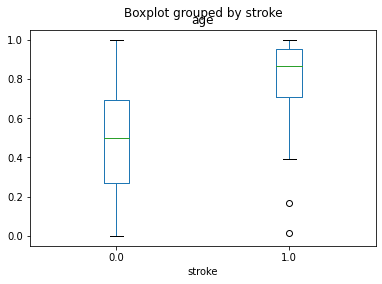

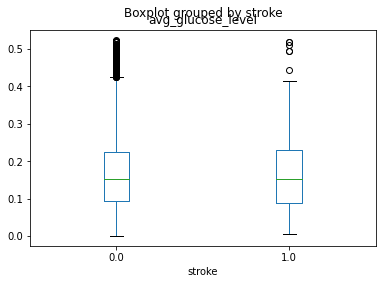

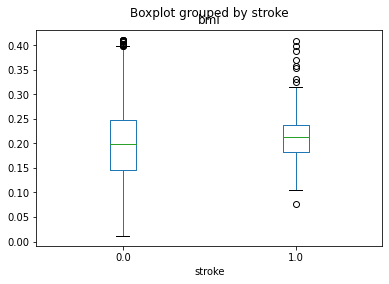

In [ ]:
for i in column_outlier:
  df_clean_outlier.boxplot(by ='stroke', column =[i], grid = False)

In [ ]:
x = df_clean_outlier.drop('stroke', axis=1)
y = df_clean_outlier['stroke']

# RESAMPLING DATASET DENGAN RANDOM UNDERSAMPLING

Resampling adalah serangkaian teknik yang digunakan dalam statistik untuk mengumpulkan lebih banyak informasi tentang sampel. Mencakup pengambilan kembali sampel atau memperkirakan keakuratannya. Dengan adanya teknik ini, pengambilan sampel ulang seringkali meningkatkan akurasi keseluruhan dan memperkirakan ketidakpastian apa pun dalam suatu populasi.

Resampling memiliki dua teknik yaitu random oversampling dan random undersampling.

Random oversampling adalah teknik yang dilakukan dengan membuat replika (resample) data minoritas sedangkan  Random Undersampling adalah pemilihan secara acak dari kelas mayoritas yang dilakukan dengan mengurangi data mayoritas sehingga diperoleh data mayoritas dan minoritas yang lebih seimbang.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
df_clean_outlier['stroke'].value_counts()

0.0    4225
1.0     165
Name: stroke, dtype: int64

In [ ]:
df_clean_outlier.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
smoking_status             0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
stroke                     0
dtype: int64

In [ ]:
x

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,1.0,0.975586,0.0,1.0,1.0,0.0,0.234512,0.254296,0.000000,0.0,0.0,1.0,0.0,0.0
6,1.0,0.902344,1.0,1.0,1.0,0.0,0.069107,0.195876,0.000000,0.0,0.0,1.0,0.0,0.0
7,0.0,0.841309,0.0,0.0,0.0,1.0,0.181285,0.143184,0.000000,0.0,0.0,1.0,0.0,0.0
8,0.0,0.719238,0.0,0.0,1.0,0.0,0.097082,0.212981,0.333333,0.0,0.0,1.0,0.0,0.0
9,0.0,0.951172,0.0,0.0,1.0,1.0,0.015927,0.159221,0.333333,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.975586,1.0,0.0,1.0,1.0,0.132167,0.212981,0.000000,0.0,0.0,1.0,0.0,0.0
5105,0.0,0.987793,0.0,0.0,1.0,1.0,0.323516,0.340206,0.000000,0.0,0.0,0.0,1.0,0.0
5106,0.0,0.426270,0.0,0.0,1.0,0.0,0.128658,0.232532,0.000000,0.0,0.0,0.0,1.0,0.0
5107,1.0,0.621582,0.0,0.0,1.0,0.0,0.513203,0.175258,0.666667,0.0,0.0,1.0,0.0,0.0


In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(x, y)

# new class distribution
print(Counter(y_rus))

# from imblearn.over_sampling import SMOTE
# # import imblearn

# # print(imblearn.__version__)
# smote = SMOTE()
# X_sm, y_sm = smote.fit_resample(x, y)

# print(Counter(y_sm))

Counter({0.0: 165, 1.0: 165})


# PENERAPAN ALGORITMA

## LOGISTIC REGRESSION

Logistic regression adalah jenis analisis statistik yang sering digunakan data analyst untuk pemodelan prediktif. Dalam pendekatan analitik ini, variabel dependennya terbatas atau kategoris, bisa berupa A atau B (regresi biner) atau berbagai opsi hingga A,B,C atau D (regresi multinomial). 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=500)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
y_pred_lr

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

In [ ]:
ac_lr=accuracy_score(y_test,y_pred_lr) * 100.0

In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_pred_lr)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_pred_lr)))
print("Accuracy score for RF: {:.2f}".format(ac_lr))
# calculate precision, recall, and f1 scores
prec_lr = precision_score(y_test,y_pred_lr) * 100.0
rec_lr = recall_score(y_test,y_pred_lr) * 100.0
f1_lr = f1_score(y_test,y_pred_lr) * 100.0
print("Precision score for RF: {:.2f}".format(prec_lr))
print("Recall score for RF: {:.2f}".format(rec_lr))
print("F1 score for RF: {:.2f}".format(f1_lr))

Classification report for RF: 
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73        34
         1.0       0.70      0.81      0.75        32

    accuracy                           0.74        66
   macro avg       0.75      0.74      0.74        66
weighted avg       0.75      0.74      0.74        66

Confusion matrix for RF: 
[[23 11]
 [ 6 26]]
Accuracy score for RF: 74.24
Precision score for RF: 70.27
Recall score for RF: 81.25
F1 score for RF: 75.36


## RANDOM FOREST

Random forest adalah kumpulan dari decission tree atau pohon keputusan. Algoritma ini merupakan kombinasi masing-masing tree dari decission tree yang kemudian digabungkan menjadi satu model. Random forest ini biasanya digunakan pengklasifikasian dataset dalam jumlah besar. Karena fungsinya bisa dugunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi. 

Algoritma random forest meningkatkan keacakan pada model sambil menumbuhkan tree. Alih-alih mencari fitur yang paling penting saat memisahkan sebuah node,random forest akan mencari fitur terbaik di antara subset fitur yang acak.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(X_test)


In [ ]:
ac_rf=accuracy_score(y_test,y_pred_rf) * 100.0
ac_rf

72.72727272727273

In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_pred_rf)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_pred_rf)))
print("Accuracy score for RF: {:.2f}".format(ac_rf))
# calculate precision, recall, and f1 scores
prec_rf = precision_score(y_test,y_pred_rf) * 100.0
rec_rf = recall_score(y_test,y_pred_rf) * 100.0
f1_rf = f1_score(y_test,y_pred_rf) * 100.0
print("Precision score for RF: {:.2f}".format(prec_rf))
print("Recall score for RF: {:.2f}".format(rec_rf))
print("F1 score for RF: {:.2f}".format(f1_rf))

Classification report for RF: 
              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71        34
         1.0       0.68      0.81      0.74        32

    accuracy                           0.73        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.74      0.73      0.73        66

Confusion matrix for RF: 
[[22 12]
 [ 6 26]]
Accuracy score for RF: 72.73
Precision score for RF: 68.42
Recall score for RF: 81.25
F1 score for RF: 74.29


## Perbandingan Random Forest dengan Logistic Regression

Dari ke dua algoritma yang diplih, Algoritma Logistic Regression memiliki performa dengan akurasi terbaik. Perbandingan akurasi yang diperoleh dapat diliat dibawah.
Dari perbandingan antara presisi, recal dan f1 score Logistic Regression memiliki kinerja yang lebih bagus dibandingkan dengan Random Forest

##PERBANDINGAN AKURASI, RECALL, PRECISION, F1 SCORE



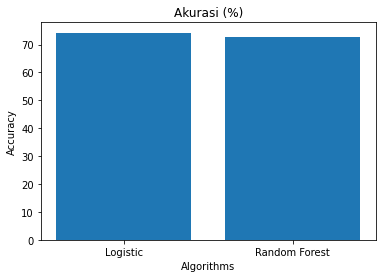

(74.24242424242425, 72.72727272727273)

In [ ]:
plt.title("Akurasi (%)")
plt.bar(['Logistic','Random Forest'],[ac_lr,ac_rf])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()
ac_lr, ac_rf

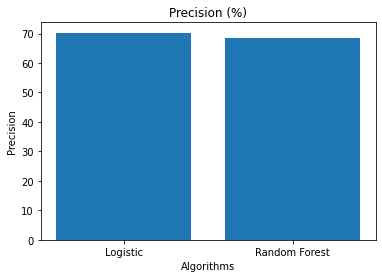

(70.27027027027027, 68.42105263157895)

In [ ]:
plt.title("Precision (%)")
plt.bar(['Logistic','Random Forest'],[prec_lr,prec_rf])
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.show()
prec_lr,prec_rf

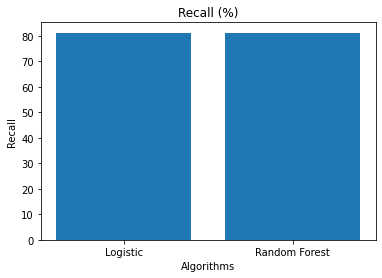

(81.25, 81.25)

In [ ]:
plt.title("Recall (%)")
plt.bar(['Logistic','Random Forest'],[rec_lr,rec_rf])
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.show()
rec_lr,rec_rf

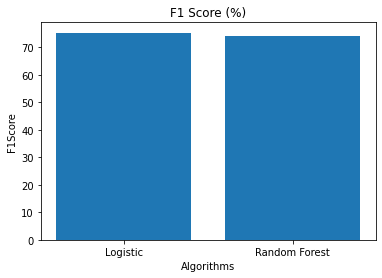

(75.36231884057972, 74.2857142857143)

In [ ]:
plt.title("F1 Score (%)")
plt.bar(['Logistic','Random Forest'],[f1_lr,f1_rf])
plt.xlabel("Algorithms")
plt.ylabel("F1Score")
plt.show()
f1_lr,f1_rf